

<span style="font-size:30px">Tarea 4: Generar el modelo </span>

# Modelamiento

###MODELAMIENTO

### Importar datos


In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('datos_procesados.csv', index_col=0)

### Explorar datos

In [3]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,2 - Medium,3 - Low,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,0.583333


In [4]:
#revisar que no hay nas
data.isna().sum()


caller_id                  0
opened_by                  0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
u_priority_confirmation    0
duracion_horas             0
dtype: int64

In [5]:
#revisar que tipo de datos hay en cada columna 
data.dtypes

caller_id                   object
opened_by                   object
contact_type                object
location                    object
category                    object
subcategory                 object
u_symptom                   object
impact                      object
urgency                     object
priority                    object
assignment_group            object
assigned_to                 object
u_priority_confirmation       bool
duracion_horas             float64
dtype: object


Tecnicamente solo me importa Priority porque segun el diccionario "priority: calculada por el sistema en base al 'impacto' y la 'urgencia'" 
Entonces la columna priority ya me tiene en cuenta el impacto y urgencia. Por eso borrare impacto y urgencia y me concentrare solo el prioridad


In [6]:
#sacar lsa columnas urgencia e impacto del data frame
data = data.drop('urgency', axis=1)
data = data.drop('impact', axis=1)
data.head()


,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333


Ver cuantas categorias tiene cada variable

In [7]:
print("caller id:", len(data['caller_id'].unique()))
print("opened_by:", len(data['opened_by'].unique()))
print("contact_type:", len(data['contact_type'].unique()))
print("location:", len(data['location'].unique()))
print("category:", len(data['category'].unique()))
print("subcategory:", len(data['subcategory'].unique()))
print("u_symptom:", len(data['u_symptom'].unique()))
print("priority:", len(data['priority'].unique()))
print("assignment_group:", len(data['assignment_group'].unique()))
print("assigned_to:", len(data['assigned_to'].unique()))
print("u_priority_confirmation:", len(data['u_priority_confirmation'].unique()))

caller id: 5004
opened_by: 200
contact_type: 4
location: 213
category: 54
subcategory: 237
u_symptom: 420
priority: 4
assignment_group: 69
assigned_to: 211
u_priority_confirmation: 2


### Dividir datos entre train y test

In [8]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split( data, test_size=0.2, random_state=2)

In [ ]:
#revisar dimensiones sean 80% train 20% test
print(train_data.shape)
print(test_data.shape)

(17197, 12)
(4300, 12)


usaremos train_data para crear el modelo y test_data para probarlo

<span style="font-size:22px">HACER CLUSTERING</span>

Como el modelo de regresion solo puede recibir datos numericos (ya sean variables dummies), hay que tratar los datos categoricos de alguna manera. Para esto se va a emplear el metodo de clustering para las variables (columnas) que tiene mas de 6 categorias. 

** Las variables con menos de 6 categorias se trataran mas adelante como variables dummies. 

El metodo de clustering que se usará es el de K-means

Solo se hara el clustering con el test data para evitar el leakage de info entre train y test data

In [9]:
#METODO 1 Clustering SIN FUNCION

'''

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# --- 1) Features por location (ajusta nombres de columnas si cambia)
features = (data.groupby("location")["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

print(features)


# --- 2) Estandarizar rápido 
X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
X = X.values  # matriz para sklearn

# --- 3) Barrido de k: inercia (codo) + silhouette
Ks = range(2, 30)  # prueba k = 2..30
inertias, sils = [], []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

# --- 4) Graficar ambas curvas
fig, ax = plt.subplots()
ax.plot(Ks, inertias, marker="o")
ax.set_xlabel("Número de clusters (k)")
ax.set_ylabel("Inercia (codo)")
ax.set_title("Método del codo")
plt.show()

fig, ax = plt.subplots()
ax.plot(Ks, sils, marker="o")
ax.set_xlabel("Número de clusters (k)")
ax.set_ylabel("Silhouette promedio")
ax.set_title("Silhouette vs k")
plt.show()

# --- 5) k sugerido por silhouette
best_k = Ks[int(np.argmax(sils))]
print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))
'''

'\n\nimport pandas as pd\nimport numpy as np\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_score\nimport matplotlib.pyplot as plt\n\n# --- 1) Features por location (ajusta nombres de columnas si cambia)\nfeatures = (data.groupby("location")["duracion_horas"]\n            .agg(mean="mean", median="median", std="std",\n                 p25=lambda x: x.quantile(0.25),\n                 p75=lambda x: x.quantile(0.75),\n                 p90=lambda x: x.quantile(0.90))\n            .fillna(0))\n\nprint(features)\n\n\n# --- 2) Estandarizar rápido \nX = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0\nX = X.values  # matriz para sklearn\n\n# --- 3) Barrido de k: inercia (codo) + silhouette\nKs = range(2, 30)  # prueba k = 2..30\ninertias, sils = [], []\n\nfor k in Ks:\n    km = KMeans(n_clusters=k, random_state=42, n_init=10)\n    labels 

In [ ]:
#Crear funcion para determinar numero de clusters K

def k_adecuado( nombre_col:str, dataset:pd.DataFrame ):
    #features es solo un data set que en cada fila tiene las estadisticas de duracion horas
    features = (dataset.groupby(nombre_col)["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

    print(features)


    # --- 2) Estandarizar rápido 
    X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
    X = X.values  # matriz para sklearn

    # --- 3) Barrido de k: inercia (codo) + silhouette
    Ks = range(2, 30)  # prueba k = 2..30
    inertias, sils = [], []

    for k in Ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

    # --- 4) Graficar ambas curvas
    fig, ax = plt.subplots()
    ax.plot(Ks, inertias, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Inercia (codo)")
    ax.set_title("Método del codo")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()


    #pedir input del star y end de la grafica 

    # --- Pedir input para el rango a graficar
    start = int(input("Ingrese el valor de k inicial para graficar: "))
    end = int(input("Ingrese el valor de k final para graficar: "))


    # Filtrar el rango
    Ks_range = [k for k in Ks if start <= k <= end]
    sils_range = [sils[i] for i, k in enumerate(Ks) if start <= k <= end]

    # --- Graficar Silhouette vs k en el rango seleccionado
    fig, ax = plt.subplots()
    ax.plot(Ks_range, sils_range, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    ax.set_xticks(Ks_range)
    plt.show()

    '''
    fig, ax = plt.subplots()
    ax.plot(Ks, sils, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()
    '''
    # --- 5) k sugerido por silhouette
    best_k = Ks[int(np.argmax(sils))]
    print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))

    k_escogido= int(input("Ingrese el valor de k escogido: "))
    return (k_escogido, features)

#Crear funcion para asignar el cluster adecuado a cada categoria

def clusters(k, features: pd.DataFrame):
    # Estandarizar igual que en k_adecuado
    features_scaled = (features - features.mean()) / features.std().replace(0, 1.0)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled.values)

    df_clusters = features.copy()
    df_clusters["cluster"] = labels

    return df_clusters, kmeans


Invocar el número de clusters por variable y guardar el df que devuelve en respectiva variable

In [11]:
data.columns

Index(['caller_id', 'opened_by', 'contact_type', 'location', 'category',
       'subcategory', 'u_symptom', 'priority', 'assignment_group',
       'assigned_to', 'u_priority_confirmation', 'duracion_horas'],
      dtype='object')

                   mean      median         std        p25         p75  \
caller_id                                                                
Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
...                 ...         ...         ...        ...         ...   
Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

                    p90  
caller_id  

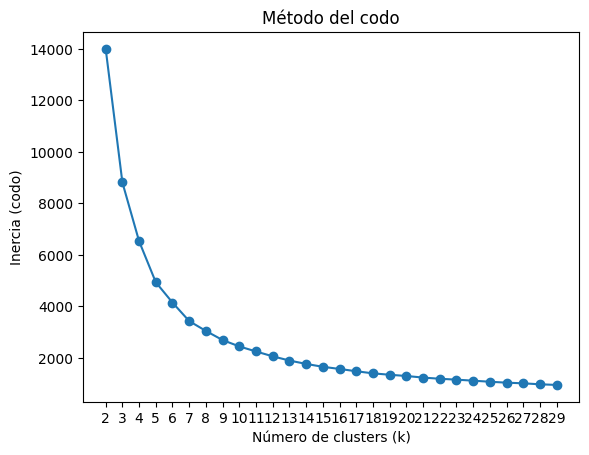

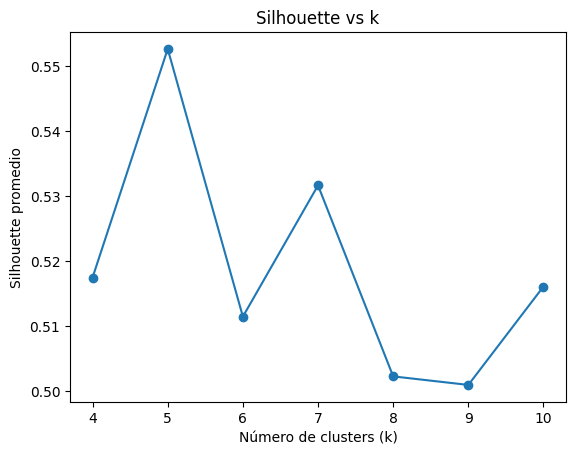

Mejor k por silhouette: 2  | silhouette: 0.5826709730973714
                      mean      median         std        p25         p75  \
opened_by                                                                   
Opened by  10   155.905556   55.783333  210.227571   4.808333  272.475000   
Opened by  101   64.475000   64.475000   51.559869  46.245833   82.704167   
Opened by  104  193.383333  193.383333  271.364012  97.441667  289.325000   
Opened by  108   93.737570   24.283333  136.654719   0.783333  141.566667   
Opened by  109   76.758696    2.050000  146.264291   0.516667   82.225000   
...                    ...         ...         ...        ...         ...   
Opened by  88    41.916667   41.916667    0.000000  41.916667   41.916667   
Opened by  9    218.184409  191.933333  171.454476  60.808333  324.516667   
Opened by  90    28.333333   28.333333    0.000000  28.333333   28.333333   
Opened by  91    21.705556    3.333333   34.600282   1.750000   32.475000   
Opened by  94   

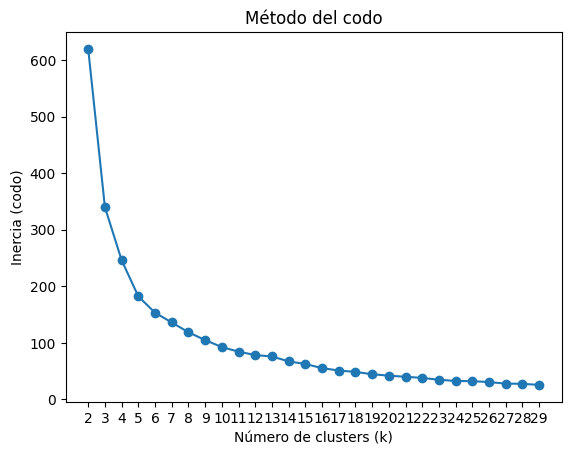

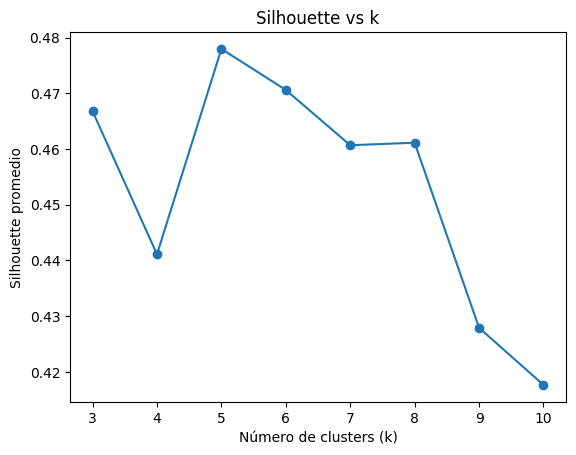

Mejor k por silhouette: 5  | silhouette: 0.4779672320750413
                    mean     median         std        p25         p75  \
location                                                                 
Location 10    35.683333  35.683333   48.201112  18.641667   52.725000   
Location 100   18.683333  18.683333    0.000000  18.683333   18.683333   
Location 101    8.550000   8.550000    0.000000   8.550000    8.550000   
Location 102    1.000000   1.000000    0.000000   1.000000    1.000000   
Location 106    0.283333   0.283333    0.000000   0.283333    0.283333   
...                  ...        ...         ...        ...         ...   
Location 95     0.066667   0.066667    0.000000   0.066667    0.066667   
Location 96    92.734649  28.475000  134.607952   0.904167  142.308333   
Location 97    74.879279   1.341667  143.644744   0.270833   92.541667   
Location 98    31.033333  31.033333    0.000000  31.033333   31.033333   
Location 99   151.538095  73.641667  202.354910   0.

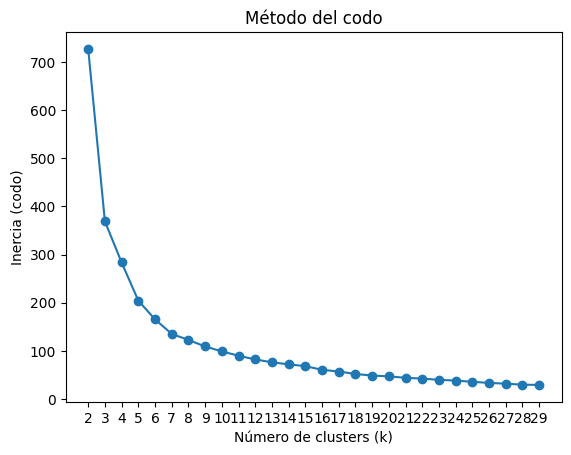

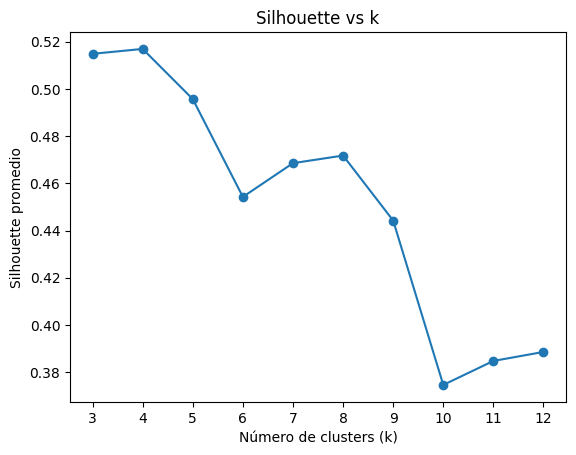

Mejor k por silhouette: 2  | silhouette: 0.5806194439295094
                   mean      median         std         p25         p75  \
category                                                                  
Category 10   93.433333  114.966667   41.493386   80.283333  117.350000   
Category 12   53.433333   53.433333    0.000000   53.433333   53.433333   
Category 13   99.702778   63.075000  117.342181    9.412500  143.358333   
Category 14   87.766667   87.766667    0.000000   87.766667   87.766667   
Category 15    0.366667    0.366667    0.000000    0.366667    0.366667   
Category 16    2.966667    2.966667    2.121320    2.216667    3.716667   
Category 17   65.871667   19.850000  110.025007    0.862500   72.658333   
Category 19  113.354192   32.083333  166.154502    4.166667  143.516667   
Category 2     0.700000    0.700000    0.377124    0.566667    0.833333   
Category 20   51.314444    1.525000   94.644466    0.216667   55.633333   
Category 21   62.079167   58.083333   48

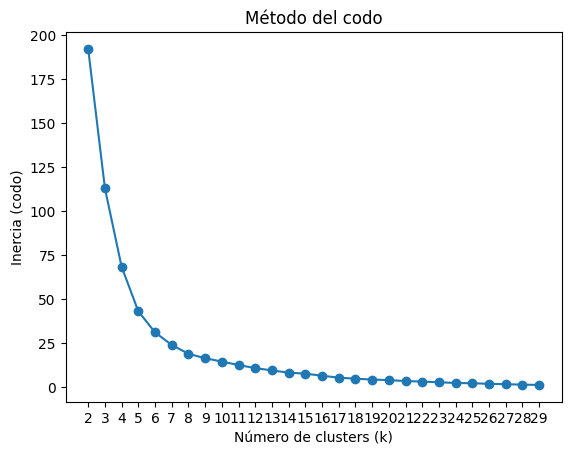

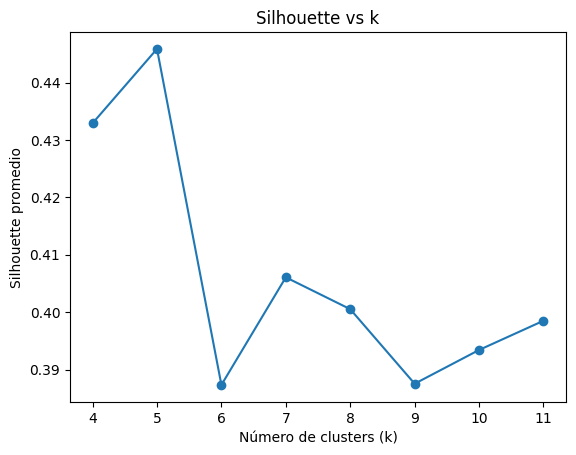

Mejor k por silhouette: 2  | silhouette: 0.7641252168368449
                       mean      median         std         p25         p75  \
subcategory                                                                   
Subcategory 10    13.690476    0.166667   27.524361    0.066667   11.000000   
Subcategory 100  124.200000  124.200000    0.000000  124.200000  124.200000   
Subcategory 101  110.377778   54.066667  125.977368    1.066667  146.983333   
Subcategory 102   97.633333   97.633333  137.909393   48.875000  146.391667   
Subcategory 103   48.438889    1.600000   92.974437    0.283333   50.250000   
...                     ...         ...         ...         ...         ...   
Subcategory 92    92.807407   45.250000  122.998627    0.483333  169.800000   
Subcategory 94   176.980952  116.500000  183.801602   27.466667  263.416667   
Subcategory 95     0.650000    0.650000    0.000000    0.650000    0.650000   
Subcategory 96   678.950000  678.950000    1.484924  678.425000  679.47

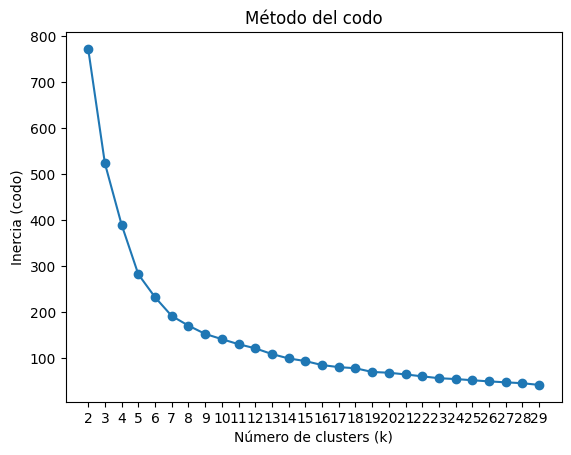

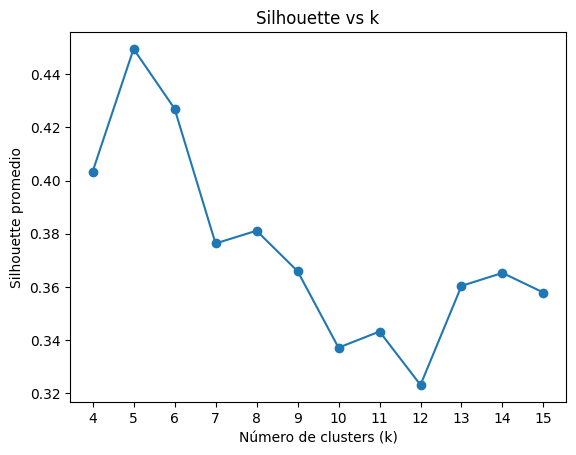

Mejor k por silhouette: 2  | silhouette: 0.5038999538325145
                    mean     median         std        p25         p75  \
u_symptom                                                                
No reportado   95.326568  22.000000  146.569403   0.516667  142.891667   
Symptom 10    100.541896  63.333333  116.266677  15.633333  138.133333   
Symptom 101   120.153333  89.950000   93.576098  48.766667  192.116667   
Symptom 102   121.552891  49.550000  143.617017   7.591667  185.808333   
Symptom 105    19.793124   0.133333   66.924207   0.066667    0.375000   
...                  ...        ...         ...        ...         ...   
Symptom 92      2.233333   2.233333    1.249222   1.791667    2.675000   
Symptom 93     56.469444  31.058333   71.865976   9.250000   69.429167   
Symptom 94     17.500000   3.166667   22.450677   3.016667   24.116667   
Symptom 97    153.766667  21.733333  245.179488  12.316667  229.200000   
Symptom 99     41.233333   5.916667   65.444915   3.

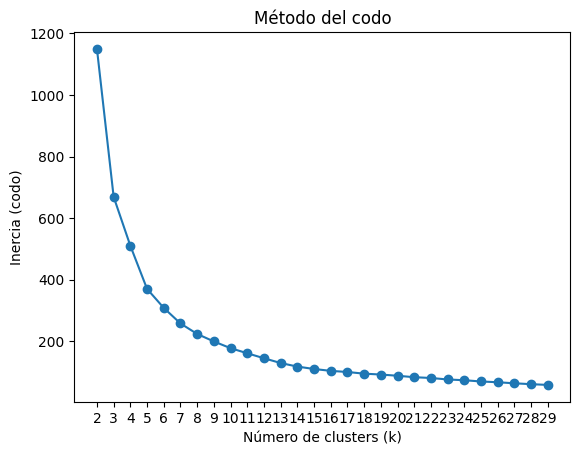

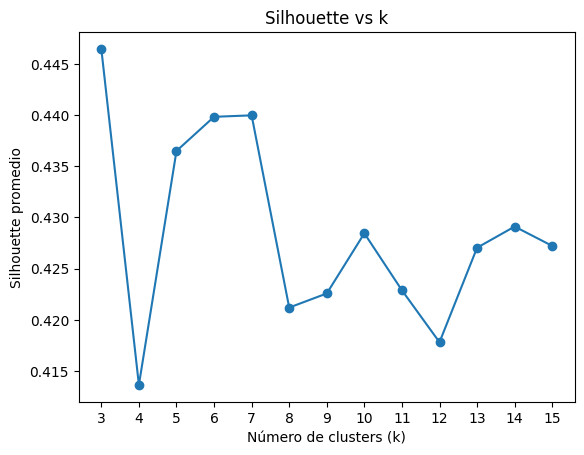

Mejor k por silhouette: 2  | silhouette: 0.5755051203258427
                        mean      median         std         p25         p75  \
assignment_group                                                               
Group 10          224.005469  171.350000  214.223908   23.325000  380.229167   
Group 12          251.326587  286.450000  184.975116   86.341667  359.295833   
Group 13          172.914912   99.916667  196.306470   25.833333  304.458333   
Group 14           99.295833   97.750000   83.552954   53.966667  143.079167   
Group 15          205.991667  119.941667  215.125000   19.895833  358.683333   
...                      ...         ...         ...         ...         ...   
Group 80          202.016667  196.616667  202.270735   99.558333  301.775000   
Group 81          140.902381  145.533333  120.079979   58.341667  182.075000   
Group 82           38.419444   18.266667   48.521815    4.641667   58.866667   
Group 9           344.895614  361.433333  229.806955  169.34

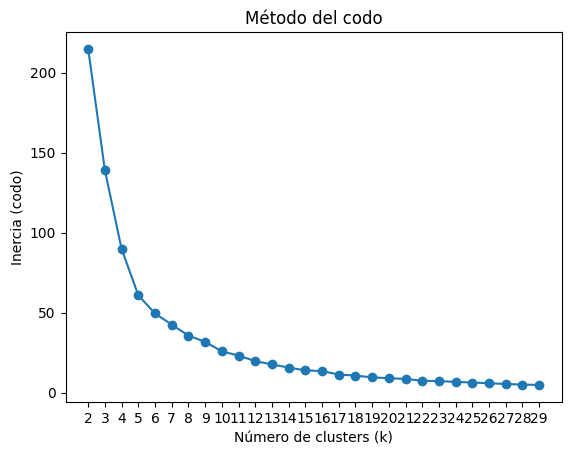

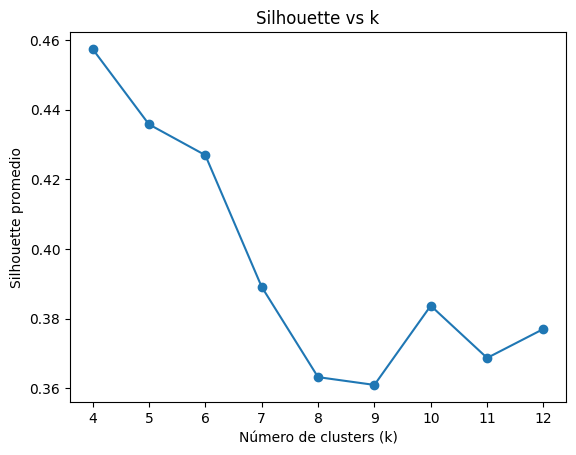

Mejor k por silhouette: 2  | silhouette: 0.47413536604526924
                    mean      median         std         p25         p75  \
assigned_to                                                                
No asignado    95.850144   21.333333  146.836279    0.400000  145.879167   
Resolver 10    69.312879   17.508333  109.250333    2.579167  111.595833   
Resolver 100  185.156173  119.683333  178.317836   71.325000  228.791667   
Resolver 101  210.617376  138.133333  211.132354   19.350000  360.625000   
Resolver 103  304.796667  263.416667  142.957701  247.350000  414.383333   
...                  ...         ...         ...         ...         ...   
Resolver 93   224.697917  172.983333  207.710915   46.770833  363.558333   
Resolver 94     7.031481    0.100000   27.442406    0.033333    0.645833   
Resolver 96   125.637500   72.375000  140.071538   40.437500  157.575000   
Resolver 97    99.821429   72.300000  107.228441   10.112500  141.383333   
Resolver 99    32.500000   

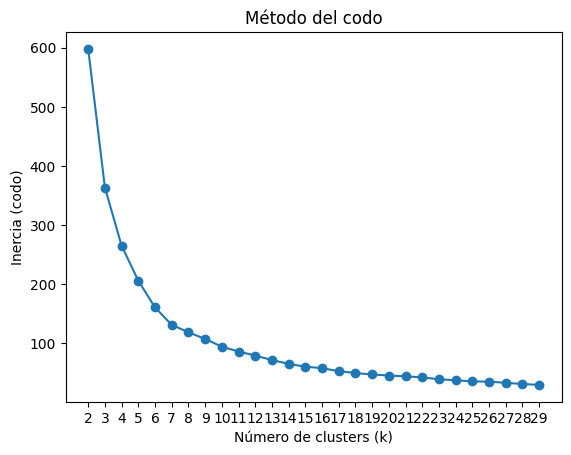

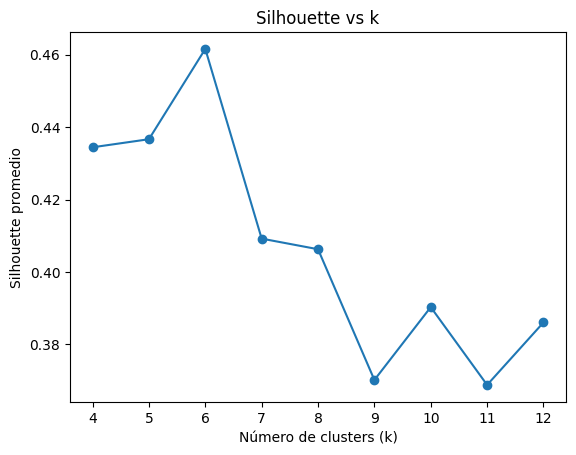

Mejor k por silhouette: 2  | silhouette: 0.5254492939493673


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


cols=['caller_id', 'opened_by', 'location', 'category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to']

features_dict={}
for col in cols:
    features_dict[f"features_{col}"] = k_adecuado(col, train_data)

In [30]:
#Ver lo que retorna K_adecuado
#un diccionario con con llave llamada features_COLUMNA 
# valores es una tupla de (K, features)
features_dict

{'features_caller_id': (5,
                     mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333 

#### Con los K ya definidos, clusterizar los datos y guardar esos dataframes de respuestas en un diccionario 

In [21]:
cluster_dict={}
for col in cols:
    k, feature = features_dict[f"features_{col}"]
    cluster_dict[col]= clusters(k,feature)

In [22]:
cluster_dict


{'caller_id': (                   mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

In [28]:
x,y= cluster_dict["caller_id"]

print(y)


KMeans(n_clusters=5, n_init=10, random_state=42)


### Integrar las categorias de los clusters al dataframe de train_data

In [ ]:
train_data["caller_id_cluster"] = train_data["caller_id"].map(cluster_maps["caller_id"]).fillna(-1).astype(int)


Volver dummies aquellas que tienes menos de 10 categorias en un dataframe diferentes

In [ ]:
df = pd.get_dummies(data, columns=['contact_type'], prefix='', prefix_sep='', dtype=int)

df.head()

,caller_id,opened_by,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas,Direct opening,Email,Phone,Self service
number,,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667,0,0,1,0
INC0000088,Caller 388,Opened by 180,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333,0,0,1,0
INC0000101,Caller 1892,Opened by 180,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667,0,0,1,0
INC0000192,Caller 1590,Opened by 131,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667,0,0,1,0
INC0000167,Caller 649,Opened by 24,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333,0,0,1,0


In [ ]:
#sacar las categorias de priority
data['priority'].unique()

array(['3 - Moderate', '4 - Low', '2 - High', '1 - Critical'],
      dtype=object)

Poner las etiquetas de prioridad como numeros 

In [ ]:
data['priority'].map({'3 - Moderate':3, '4 - Low': 4,'2 - High': 2,'1 - Critical':1 })

number
INC0000077    3
INC0000088    3
INC0000101    4
INC0000192    3
INC0000167    3
             ..
INC0118026    3
INC0119390    3
INC0120835    3
INC0121064    3
INC0120304    3
Name: priority, Length: 21497, dtype: int64

In [ ]:
data['priority'] = data['priority'].map({'3 - Moderate':3, '4 - Low': 4,'2 - High': 2,'1 - Critical':1 })

In [ ]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3,Group 70,Resolver 17,False,0.583333
